In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape.csv')

In [3]:
df.head()

,3.159499363321345566e-02,9.869877579082642072e-01,0.000000000000000000e+00
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [4]:
df['X'] = df['3.159499363321345566e-02']
df['Y'] = df['9.869877579082642072e-01']
df['Class'] = df['0.000000000000000000e+00']

In [5]:
df.drop(columns=['3.159499363321345566e-02','9.869877579082642072e-01','0.000000000000000000e+00'],inplace=True)

In [6]:
df.head()

,X,Y,Class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


In [7]:
new_row = pd.DataFrame({'X':[0.031594],'Y':[0.986987],'Class':[0.0]})

In [8]:
df = pd.concat([df,new_row], ignore_index=True)

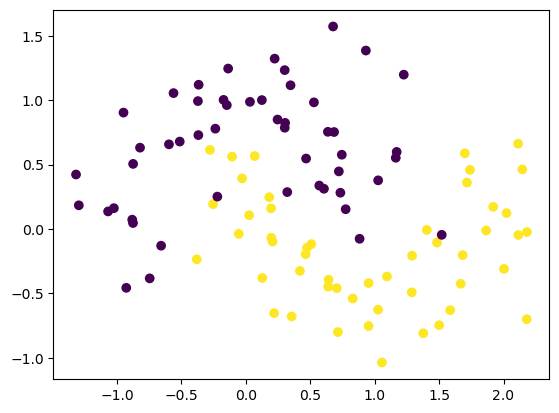

In [9]:
plt.scatter(df['X'],df['Y'],c=df['Class'])
plt.show()

In [10]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(2, activation='tanh',input_dim=2))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 2)                 6         
                                                                 
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.get_weights()

[array([[ 0.80218065, -1.100143  ],
        [ 0.50876164, -1.1276739 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.75545925,  0.69848585],
        [-0.90279114, -1.0791805 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.72033906, -0.21294188],
        [ 0.9743849 , -0.81100035]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.63336945,  0.94374526],
        [-0.02805257, -0.9059988 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-1.3858355],
        [-1.2973609]], dtype=float32),
 array([0.], dtype=float32)]

In [14]:
initial_weights = model.get_weights()

In [15]:
len(initial_weights)

10

In [16]:
initial_weights[0] = np.random.randn(model.get_weights()[0].shape[0],model.get_weights()[0].shape[1])*0.01
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(model.get_weights()[2].shape[0],model.get_weights()[2].shape[1])*0.01
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(model.get_weights()[4].shape[0],model.get_weights()[4].shape[1])*0.01
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(model.get_weights()[6].shape[0],model.get_weights()[6].shape[1])*0.01
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(model.get_weights()[8].shape[0],model.get_weights()[8].shape[1])*0.01
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [17]:
model.set_weights(initial_weights)

In [18]:
model.get_weights()

[array([[ 0.00129608,  0.00275091],
        [-0.01327214, -0.01449033]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00464232, -0.0057632 ],
        [-0.00940341,  0.02023809]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[ 0.01637842, -0.01181178],
        [-0.0097678 ,  0.00324674]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.01105124, -0.00813926],
        [ 0.00474715, -0.00401275]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[-0.00546522],
        [-0.00500228]], dtype=float32),
 array([0.], dtype=float32)]

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
history = model.fit(x,y,epochs=100,validation_split=0.2,verbose=True)

Epoch 1/100
3/3 [==============================] - 1s 105ms/step - loss: 0.6932 - accuracy: 0.4000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 16ms/step - loss: 0.6932 - accuracy: 0.4250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 8/100
3/3 [==

In [21]:
model.get_weights()

[array([[ 0.00132178,  0.00322522],
        [-0.01329822, -0.01496733]], dtype=float32),
 array([-1.9600530e-07, -2.8285676e-06], dtype=float32),
 array([[-0.00495628, -0.00556698],
        [-0.00978106,  0.02047449]], dtype=float32),
 array([ 9.8488155e-05, -6.8830159e-05], dtype=float32),
 array([[ 0.01669992, -0.01177963],
        [-0.01014482,  0.00320946]], dtype=float32),
 array([0.00029704, 0.0004029 ], dtype=float32),
 array([[-0.00795835, -0.00514268],
        [ 0.00505677, -0.0029006 ]], dtype=float32),
 array([-1.7614229e-06,  2.9783077e-06], dtype=float32),
 array([[3.0335020e-06],
        [4.7092638e-07]], dtype=float32),
 array([0.00733994], dtype=float32)]

9600/9600 [==============================] - 9s 959us/step


<Axes: >

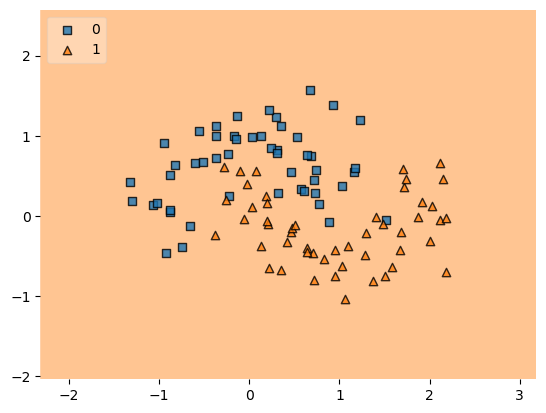

In [22]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y.astype('int'), clf=model, legend=2)